<a href="https://colab.research.google.com/github/paularaissa/esda/blob/main/ESDA_pilhas_filas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Filas**


Uma fila é uma estrutura de dados dinâmica que admite **remoção** de elementos e **inserção** de novos objetos.
Mais especificamente, uma  fila  (= *queue*)  é uma estrutura sujeita à seguinte regra de operação:  sempre que houver uma remoção, o elemento removido é o que está na estrutura há mais tempo.
Ou seja, o primeiro objeto inserido na fila é também o primeiro a ser removido. 
Essa política é conhecida pela sigla **FIFO (= First-In-First-Out)**. 

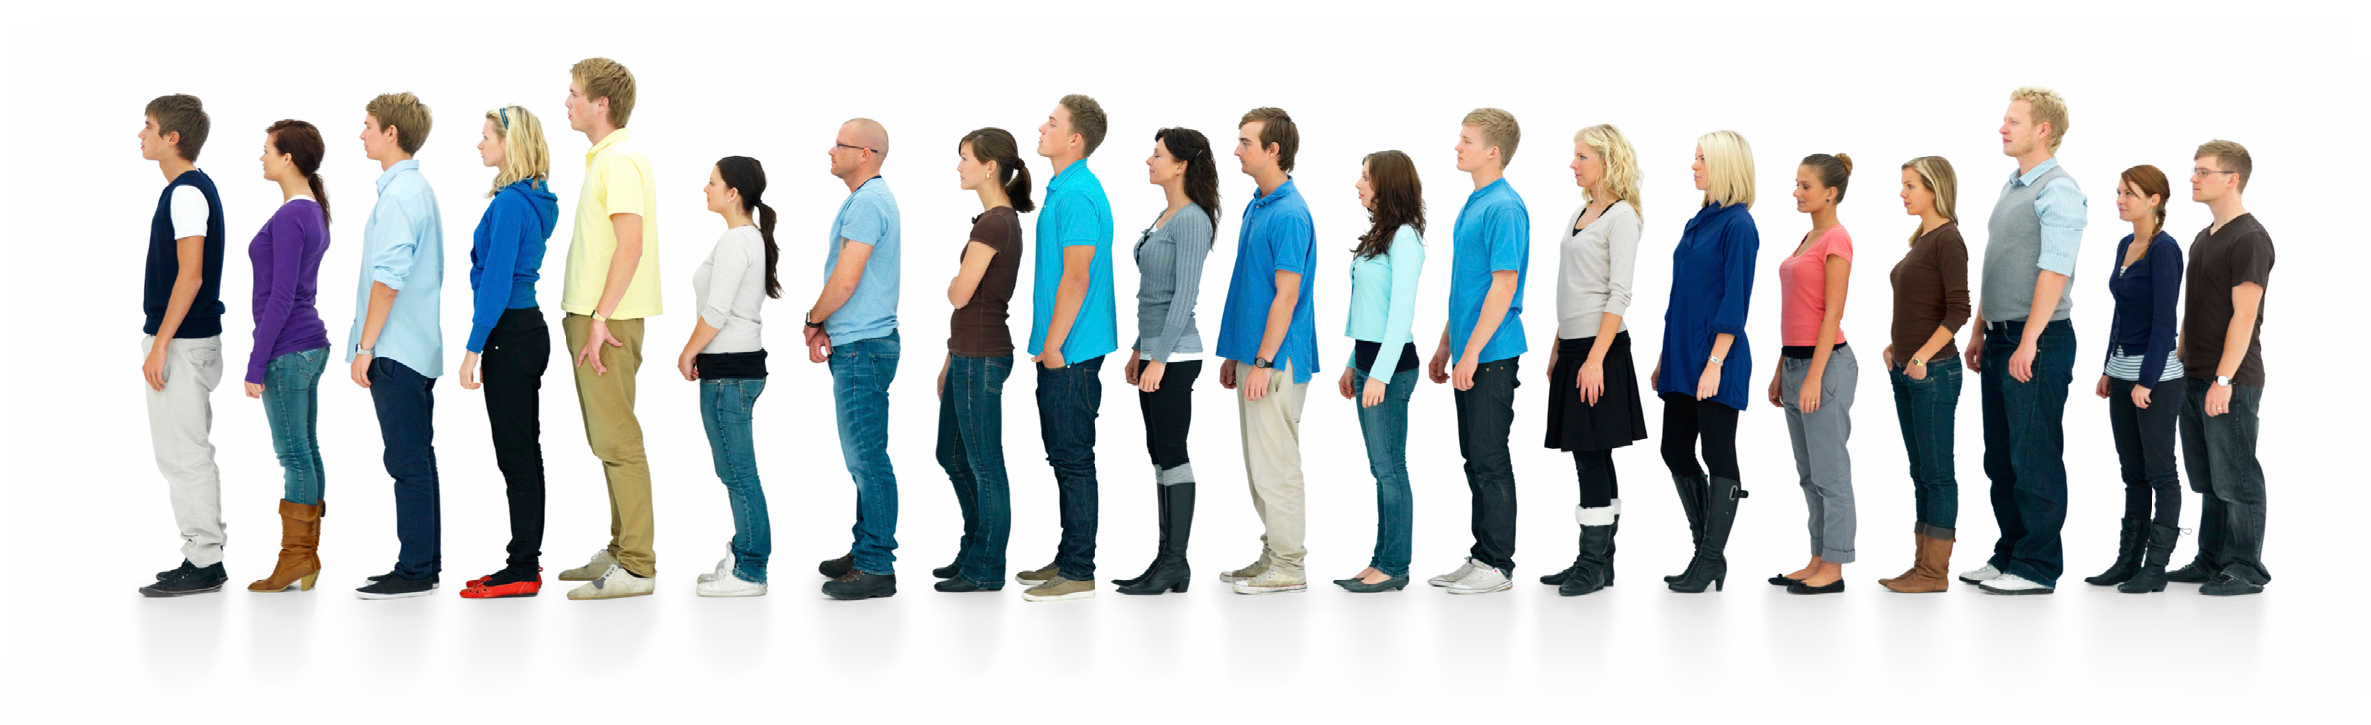

## Implementação em um Vetor

Suponha que nossa fila mora em um vetor fila[0..N-1].  (A natureza dos elementos do vetor é irrelevante: eles podem ser inteiros, bytes, ponteiros, etc.)  Digamos que a parte do vetor ocupada pela fila é 

`fila[p..u-1]`

O primeiro elemento da fila está na posição p e o último na posição u-1.  A fila está vazia se  `p == u`  e cheia se  `u == N`. A figura mostra uma fila que contém os números 111, 222, … , 666: 

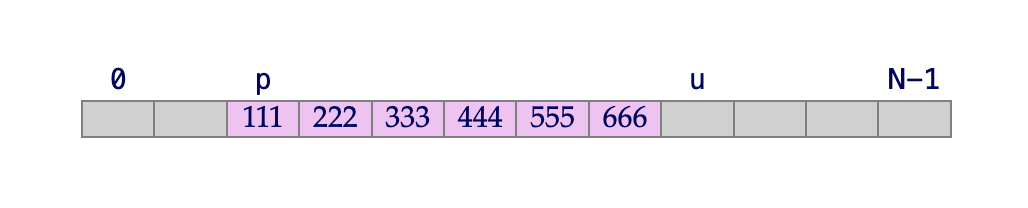

Para *tirar, ou remover (= delete = de-queue)*, um elemento da fila basta fazer 

`x = fila[p++];`  

Isso equivale ao par de instruções `x = fila[p]; p += 1;`, nesta ordem. É claro que você só deve fazer isso se tiver certeza de que a fila não está vazia. 

Para *adicionar, ou inserir (= insert = enqueue)*, um objeto `y` na fila basta fazer

`fila[u++] = y;` 

Isso equivale ao par de instruções `fila[u] = y; u += 1;`,  nesta ordem.  Note como esse código funciona corretamente mesmo quando a fila está vazia. É claro que você só deve inserir um objeto na fila se ela não estiver cheia; caso contrário, a fila transborda (ou seja, ocorre um *overflow*).

Podemos escrever as operações de remoção e inserção em duas pequenas funções. Se os objetos da fila forem números inteiros, podemos escrever 

```
int tiradafila (void) {
   return fila[p++];
}

void colocanafila (int y) {
   fila[u++] = y;
}
```

Estamos supondo aqui que as variáveis `fila`, `p`, `u` e `N` são *globais*, isto é, foram definidas fora do código das funções. 

In [ ]:
#define N 100
int fila[N], int p, u;
int dist[N];

void criafila (void) {
   p = u = 0;
}

int filavazia (void) {
   return p >= u;
}

int tiradafila (void) {
   return fila[p++];
}

void colocanafila (int y) {
   fila[u++] = y;
}

// Esta função recebe uma matriz A
// que representa as interligações entre
// cidades 0..N-1 e preenche o vetor dist
// de modo que dist[i] seja a distância
// da cidade c à cidade i, para cada i.

void distancias (int A[][N], int c) {
   for (int j = 0; j < N; ++j)  dist[j] = N;
   dist[c] = 0;
   criafila ();
   colocanafila (c);

   while (! filavazia ()) { 
      int i = tiradafila ();
      for (int j = 0; j < N; ++j)
         if (A[i][j] == 1 && dist[j] >= N) {
            dist[j] = dist[i] + 1;
            colocanafila (j);
         }
   }
}

## Implementação em vetor com redimensionamento

Nem sempre é possível prever a quantidade de espaço que deve ser reservada para a fila de modo a evitar transbordamentos. Se o vetor que abriga a fila foi alocado dinamicamente (com a função malloc), é possível resolver essa dificuldade redimensionando o vetor:  toda vez que a fila ficar cheia, aloque um vetor maior e transfira a fila para esse novo vetor. Para evitar redimensionamentos frequentes, convém que o novo vetor seja pelo menos duas vezes maior que o original.

Eis um exemplo para o caso em que a fila contém números inteiros (e as variáveis fila, p, u e N são globais): 

```
void redimensiona (void) {
   N *= 2;
   fila = realloc (fila, N * sizeof (int));
}
```

Uma versão *ad hoc* poderia ser escrita assim sem usar realloc: 

```
void redimensiona (void) {
   N *= 2;
   int *novo;
   novo = malloc (N * sizeof (int));
   for (int i = p; i < u; i++)
      novo[i] = fila[i];
   free (fila);
   fila = novo;
}
```

Outra opção seria transferir fila[p..u-1] para novo[0..u-p-1] e reajustar as variáveis p e u de acordo. 

## Fila implementada em uma lista ligada

Como administrar uma fila armazenada em uma lista ligada? Digamos que as células da lista são do tipo celula: 

```
typedef struct reg {
   int         conteudo; 
   struct reg *prox;
} celula;
```

É preciso tomar algumas decisões de projeto sobre como a fila vai morar na lista.  Vamos supor que nossa lista ligada é circular: a última célula aponta para a primeira. Vamos supor também que a lista tem uma célula-cabeça; essa célula não é removida nem mesmo se a fila ficar vazia. O primeiro elemento da fila fica na segunda célula e o último elemento fica na célula anterior à cabeça. 

Um ponteiro fi aponta a célula-cabeça. A fila está vazia se fi->prox == fi.  Uma fila vazia pode ser criada e inicializada assim: 

```
celula *fi;
fi = malloc (sizeof (celula));
fi->prox = fi;
```
Podemos agora definir as funções de manipulação da fila.  A remoção é fácil: 

In [ ]:
// Tira um elemento da fila fi e devolve
// o conteudo do elemento removido.
// Supõe que a fila não está vazia.

int tiradafila (celula *fi) {
   celula *p;
   p = fi->prox;  // o primeiro da fila
   int x = p->conteudo;
   fi->prox = p->prox;
   free (p);
   return x;  
}

A inserção usa um truque: armazena o novo elemento na célula-cabeça original e cria uma nova célula-cabeça: 

In [ ]:
// Coloca um novo elemento com conteudo y
// na fila fi. Devolve o endereço da
// cabeça da fila resultante.

celula *colocanafila (int y, celula *fi) { 
   celula *nova;
   nova = malloc (sizeof (celula));
   nova->prox = fi->prox;
   fi->prox = nova;
   fi->conteudo = y;
   return nova;
}

In [ ]:
%%file fila_numeros.c

#include <stdio.h>
#include <stdlib.h>

struct Fila {
	int capacidade;
	float *dados;
	int primeiro;
	int ultimo;
	int nItens; 
};

void criarFila( struct Fila *f, int c ){ 
	f->capacidade = c;
	f->dados = (float*) malloc (f->capacidade * sizeof(float));
	f->primeiro = 0;
	f->ultimo = -1;
	f->nItens = 0; 
}

void inserir(struct Fila *f, int v){
	if(f->ultimo == f->capacidade-1)
		f->ultimo = -1;

	f->ultimo++;
	f->dados[f->ultimo] = v; // incrementa ultimo e insere
	f->nItens++; // mais um item inserido
}

int remover(struct Fila *f) { // pega o item do começoo da fila

	int temp = f->dados[f->primeiro++]; // pega o valor e incrementa o primeiro

	if(f->primeiro == f->capacidade)
		f->primeiro = 0;

	f->nItens--;  // um item retirado
	return temp;
}

int estaVazia(struct Fila *f){ // retorna verdadeiro se a fila estÃ¡ vazia

	return (f->nItens==0);

}

int estaCheia(struct Fila *f){ // retorna verdadeiro se a fila estÃ¡ cheia

	return (f->nItens == f->capacidade);
}

void mostrarFila(struct Fila *f){

	int cont, i;

	for( cont=0, i= f->primeiro; cont < f->nItens; cont++){
		printf("%.2f\t",f->dados[i++]);

		if (i == f->capacidade)
			i=0;
	}
	printf("\n\n");
}

void main(){

	int opcao, capa;
	float valor;
	struct Fila umaFila;

	// cria a fila
	printf("\nCapacidade da fila? ");
	scanf("%d",&capa);
	criarFila(&umaFila, capa);

	// apresenta menu
	while(1){

		printf("\n1 - Inserir elemento\n2 - Remover elemento\n3 - Mostrar Fila\n0 - Sair\n\nOpcao? ");
		scanf("%d", &opcao);

		switch(opcao){
			case 0: exit(0);

			case 1: // insere elemento
				if (estaCheia(&umaFila)){
					printf("\nFila Cheia!!!\n\n");
				}
				else {
					printf("\nValor do elemento a ser inserido? ");
					scanf("%f", &valor);
					inserir(&umaFila,valor);
				}
				break;

			case 2: // remove elemento
				if (estaVazia(&umaFila)){
					printf("\nFila vazia!!!\n\n");
				}
				else {
					valor = remover(&umaFila);
					printf("\n%1f removido com sucesso\n\n", valor) ; 

				}
				break;

				case 3: // mostrar fila
					if (estaVazia(&umaFila)){
						printf("\nFila vazia!!!\n\n");
					}
					else {
						printf("\nConteudo da fila => ");
						mostrarFila(&umaFila);
					}
					break;

				default:
					printf("\nOpcao Invalida\n\n");
		}
	}
}

In [ ]:
! gcc fila_numeros.c -o fila_numeros

In [ ]:
%%shell

./fila_numeros

# **Pilhas**

Uma pilha é uma estrutura de dados que admite remoção de elementos e inserção de novos objetos.  Mais especificamente, uma  *pilha (= stack)*  é uma estrutura sujeita à seguinte regra de operação:  sempre que houver uma remoção, **o elemento removido é o que está na estrutura há menos tempo**.

Em outras palavras, o primeiro objeto a ser inserido na pilha é o último a ser removido. Essa política é conhecida pela sigla **LIFO (= Last-In-First-Out)**. 

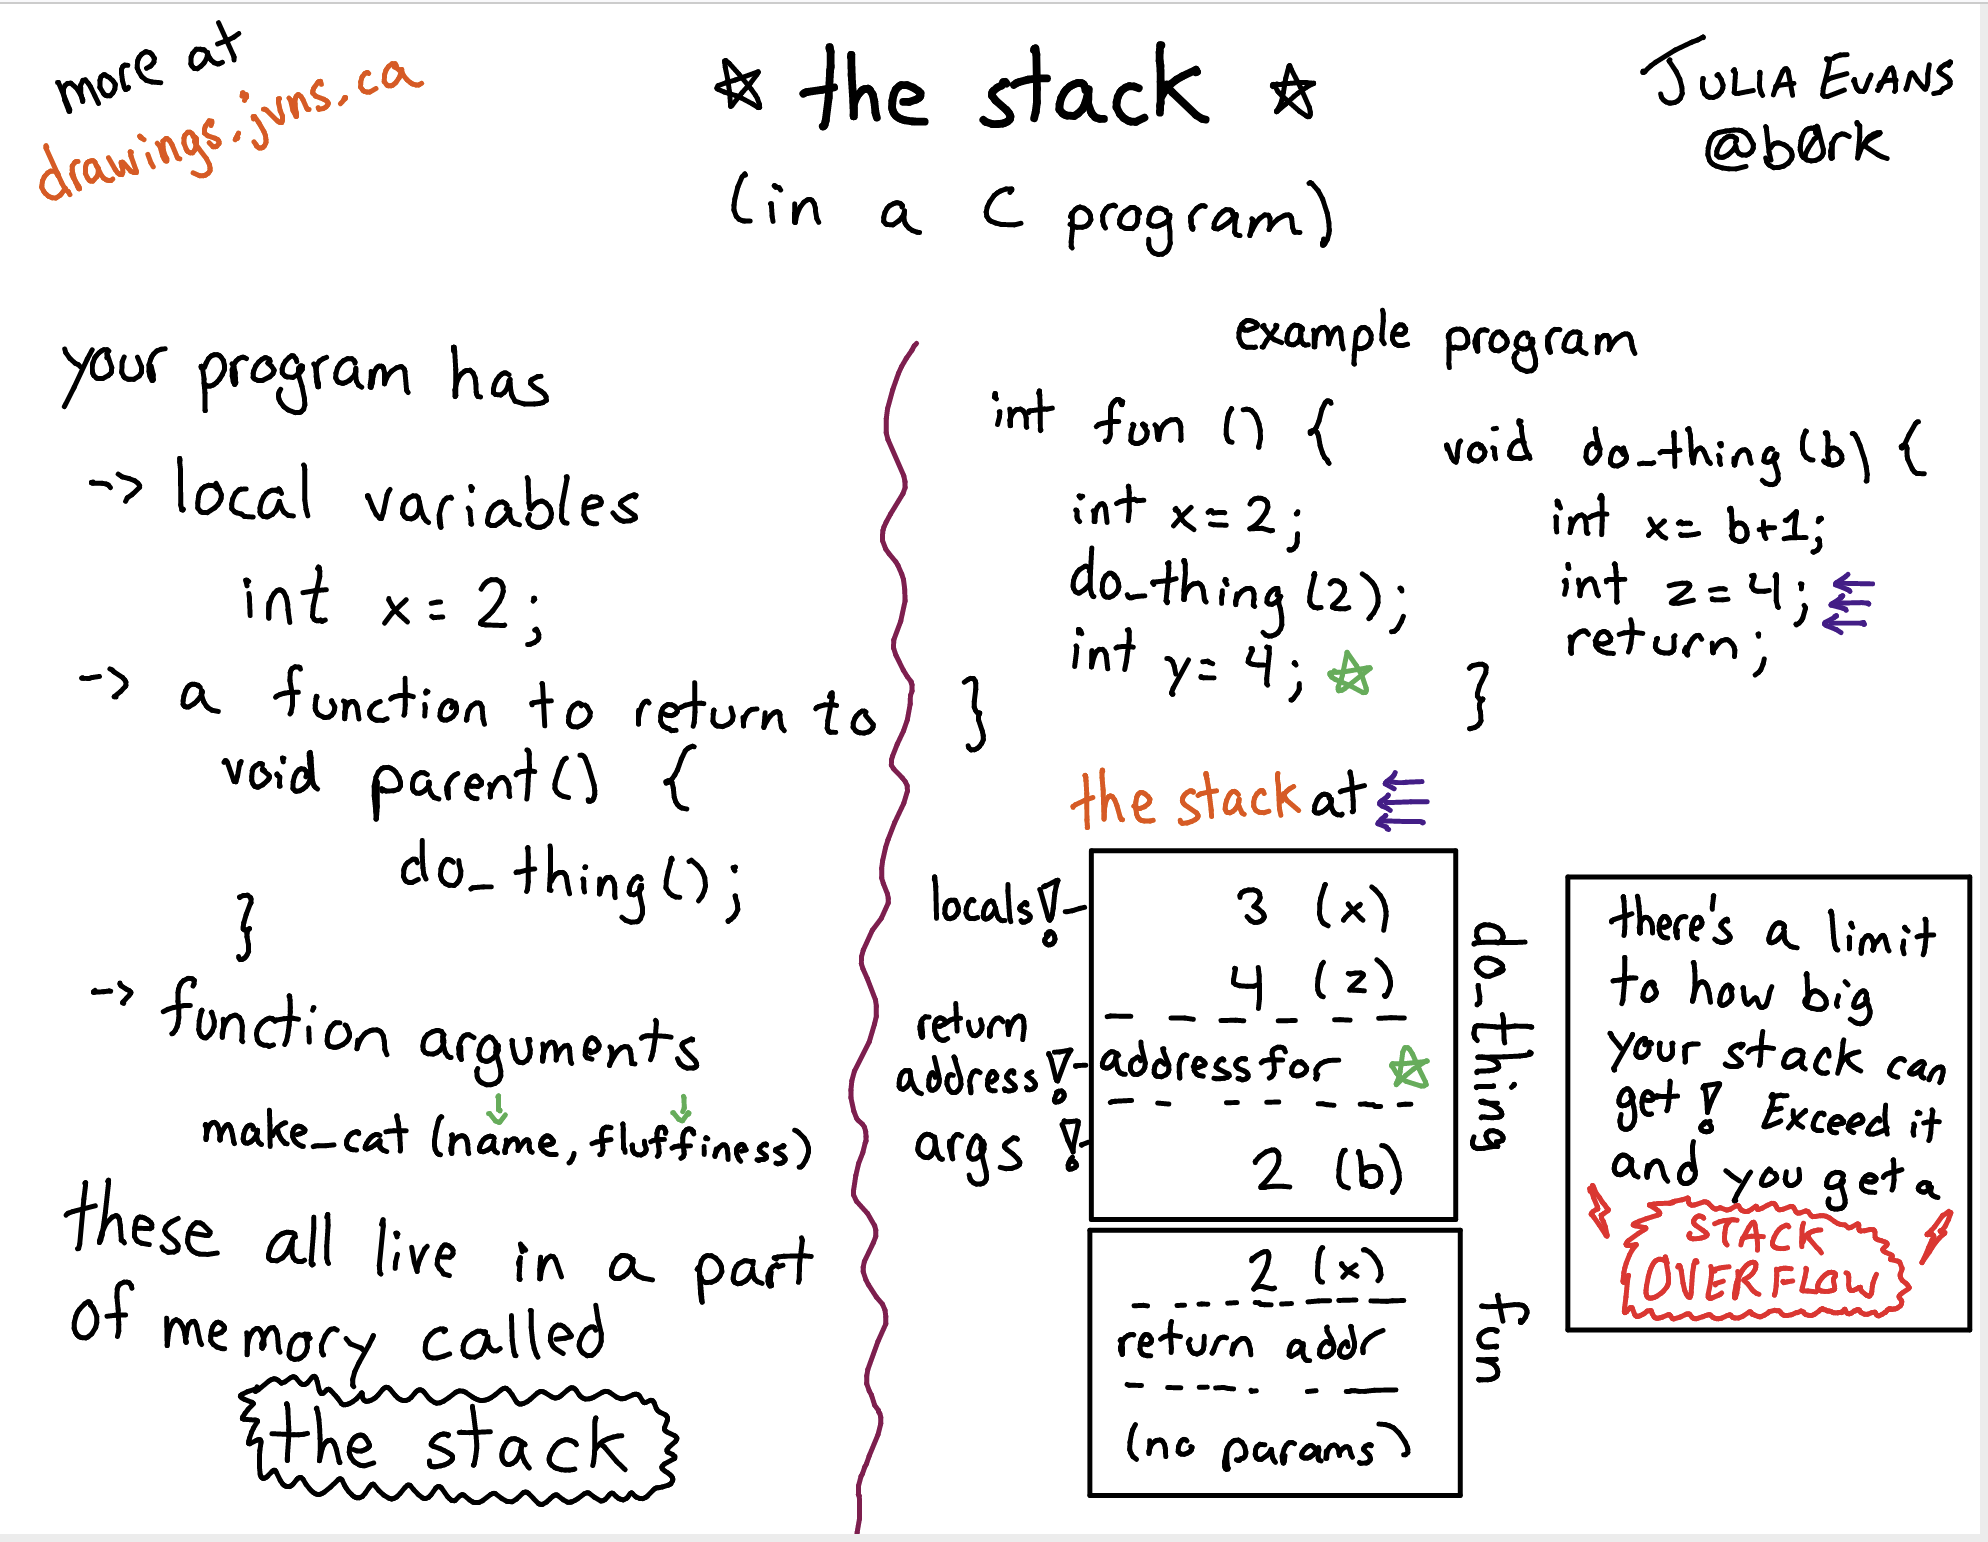

## Implementação em um vetor

Suponha que nossa pilha está armazenada em um vetor  pilha[0..N-1].  (A natureza dos elementos do vetor é irrelevante: eles podem ser inteiros, bytes, ponteiros, etc.)  Digamos que a parte do vetor ocupada pela pilha é 

`pilha[0..t-1]`

O índice *t* indica a primeira posição vaga da pilha e `t-1` é o índice do topo da pilha.  A pilha está vazia se `t` vale `0` e cheia se `t` vale `N`. No exemplo da figura, os caracteres *A, B, … , H* foram inseridos na pilha nessa ordem: 

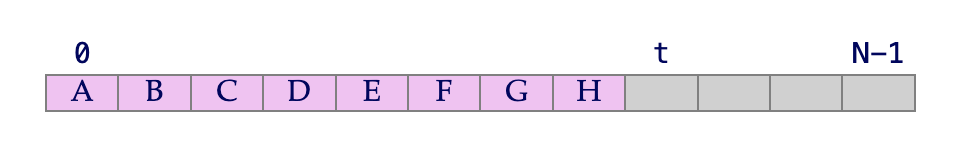

Para *remover, ou tirar*, um elemento da pilha — essa operação é conhecida como *desempilhar* *(= to pop)*: 

```
x = pilha[--t];
```
Isso equivale ao par de instruções `t -= 1;  x = pilha[t];`, nessa ordem. É claro que você só deve desempilhar se tiver certeza de que a pilha **não** está vazia. 

Para inserir, ou colocar, um objeto y na pilha — a operação é conhecida como *empilhar (= to push)*: 

```
pilha[t++] = y;
```

Isso equivale ao par de instruções `pilha[t] = y;  t += 1;`, nessa ordem.  Antes de empilhar, certifique-se de que a pilha não está cheia, para evitar um *transbordamento (= overflow)*.

Pode-se escrever essas operações em duas pequenas funções. Se os objetos com que estamos lidando são do tipo char, podemos escrever 

```
char desempilha (void) {
   return pilha[--t];
}

void empilha (char y) {
   pilha[t++] = y;
}
```

## Implementação em vetor com redimensionamento

Nem sempre é possível prever a quantidade de espaço que deve ser reservada para abrigar a pilha de modo a evitar transbordamentos. Podemos, então, redimensionar o vetor toda vez que a pilha ficar cheia (como já fizemos com a implementação de fila). 

## Pilha implementada em uma lista ligada

Como implementar uma pilha de caracteres *ASCII* em uma lista ligada?  Digamos que as células da lista são do tipo celula: 
```
typedef struct reg {
   char        conteudo; 
   struct reg *prox;
} celula;
```
Decisões de projeto: Nossa lista terá uma célula-cabeça (e portanto a primeira célula da lista não faz parte da pilha). Uma variável global `pi` apontará a cabeça da lista:

`celula *pi;`

O topo da pilha ficará na segunda célula e não na última. As funções de criação e manipulação da pilha podem então ser escritas assim: 

In [ ]:
void criapilha (void) {
   pi = malloc (sizeof (celula)); // cabeça
   pi->prox = NULL; 
}

void empilha (char y) { 
   celula *nova;
   nova = malloc (sizeof (celula));
   nova->conteudo = y;
   nova->prox  = pi->prox;
   pi->prox = nova; 
}

char desempilha (void) {
   celula *p;
   p = pi->prox;
   char x = p->conteudo;
   pi->prox = p->prox;
   free (p);
   return x; 
}

int main(void) {
  int i, j, k, y;
  i = 111; 
  j = 222; 
  k = 444;
  y = F(i, j, k);
  printf ("%d\n", y);
  return EXIT_SUCCESS;
}

(A função desempilha não deve ser invocada se a pilha estiver vazia.) 

In [ ]:
%%file pilha_numeros.c

#include <stdio.h>
#include <stdlib.h>

struct Pilha {
  int topo; /* posição elemento topo */
	int capa;
	float *pElem;
};

void criarpilha(struct Pilha *p, int c){
  p->topo = -1;
  p->capa = c;
  p->pElem = (float*) malloc (c * sizeof(float));
}

int estavazia(struct Pilha *p){
  if(p-> topo == -1)
    return 1;   // true
  else
    return 0;   // false
}

int estacheia(struct Pilha *p){
  if (p->topo == p->capa - 1) return 1;
	else return 0;

}

void empilhar(struct Pilha *p, float v){
  p->topo++;
	p->pElem [p->topo] = v;
}

float desempilhar(struct Pilha *p){
  float aux = p->pElem[p->topo];
  p->topo--;
  return aux;
}

float retornatopo(struct Pilha *p){
   return p->pElem [p->topo];
}

int main(){
	struct Pilha minhapilha;
	int capacidade, op;
	float valor;

	printf( "\nCapacidade da pilha? " );
	scanf( "%d", &capacidade );

	criarpilha (&minhapilha, capacidade);

	while(1){
		printf("\n1 - Empilhar (PUSH)\n");
		printf("2 - Desempilhar (POP)\n");
		printf("3 - Mostrar o topo \n");
		printf("4 - sair\n");
		printf("\nopcao? ");
		scanf("%d", &op);

		switch (op){
			case 1: //push
				if( estacheia( &minhapilha ) == 1 )
					printf("\nPILHA CHEIA! \n");
				else {
					printf("\nVALOR? ");
					scanf("%f", &valor);
					empilhar (&minhapilha, valor);
				}
				break;

			case 2: //pop
				if ( estavazia(&minhapilha) == 1 )
					printf( "\nPILHA VAZIA! \n" );
				else{
					valor = desempilhar (&minhapilha);
					printf ( "\n%.1f DESEMPILHADO!\n", valor );
				}
				break;

			case 3: // mostrar o topo
				if ( estavazia (&minhapilha) == 1 )
					printf( "\nPILHA VAZIA!\n" );
				else {
					valor = retornatopo (&minhapilha);
					printf ( "\nTOPO: %.1f\n", valor );
				}
				break;

			case 4: 
				exit(0);

			default: printf( "\nOPCAO INVALIDA! \n" );
		}
	}	
}

In [ ]:
! gcc pilha_numeros.c -o pilha_numeros

In [ ]:
%%shell 

./pilha_numeros

## A pilha de execução de um programa

Todo programa C consiste em uma ou mais funções (sendo main a primeira função a ser executada). Para administrar as invocações das funções, o computador usa uma pilha de execução.A operação pode ser descrita conceitualmente da seguinte maneira: 

Ao encontrar a invocação de uma função, o computador cria um novo "espaço de trabalho", que contém todos os parâmetros e todas as variáveis locais da função. Esse espaço de trabalho é colocado na pilha de execução (por cima do espaço de trabalho que invocou a função) e a execução da função começa (confinada ao seu espaço de trabalho). Quando a execução da função termina, o seu espaço de trabalho é removido da pilha e descartado. O espaço de trabalho que estiver agora no topo da pilha é reativado e a execução é retomada do ponto em que havia sido interrompida.

Considere o seguinte exemplo: 

In [ ]:
%%file pilha_processos.c

#include <stdio.h>
#include <stdlib.h>

int G(int a, int b) {
  int x;
  x = a + b;
  return x;
}

int F(int i, int j, int k) {
  int x; 
  x = G(i, j);
  x = x + k;
  return x;
}

int main(void) {
  int i, j, k, y;
  i = 111; 
  j = 222; 
  k = 444;
  y = F(i, j, k);
  printf ("%d\n", y);
  return EXIT_SUCCESS;
}

Overwriting pilha_processos.c


In [ ]:
! gcc pilha_processos.c -o pilha_processos

In [ ]:
%%shell 

./pilha_processos

777


A execução do programa prossegue da seguinte maneira:

* Um espaço de trabalho é criado para a função main e colocado na pilha de 
execução.  O espaço contém as variáveis locais *i*, *j*, *k* e *y*.  A execução de `main` começa.
* No ponto `1`, a execução de `main` é temporariamente interrompida e um espaço de trabalho para a função `F` é colocado na pilha. Esse espaço contém os parâmetros *i*, *j*, *k* da função (com valores 111, 222 e 444 respectivamente) e a variável local `x`.  Começa então a execução de `F`.
* No ponto 2, a execução de `F` é interrompida e um espaço de trabalho para a função `G` é colocado na pilha. Esse espaço contém os parâmetros `a` e `b` da função (com valores 111 e 222 respectivamente) e a variável local `x`. Em seguida, começa a execução de `G`.
* Quando a execução de `G` termina, a função devolve 333. O espaço de trabalho de `G` é removido da pilha e descartado. O espaço de trabalho de `F` (que agora está no topo da pilha de execução) é reativado e a execução é retomada no ponto 3.  A primeira instrução executada é `x = 333;`.
* Quando a execução de `F` termina, a função devolve `777`. O espaço de trabalho de `F` é removido da pilha e descartado. O espaço de trabalho de `main` (que agora está no topo da pilha) é reativado e a execução é retomada no ponto `4`.  A primeira instrução executada é `y = 777;`. 

No nosso exemplo, `F` e `G` são funções distintas. Mas tudo funcionaria da mesma maneira se `F` e `G` fossem idênticas, ou seja, se F fosse uma função recursiva.

# **Make File**

Para automatizar um pouco a compilação do seu programa, reduzindo assim a digitação enfadonha de longas linhas de comando, use o utilitário make.  No caso do exemplo discutido acima, coloque um arquivo Makefile muito simples no seu diretório de trabalho e diga para compilar o programa. 

`~$ make xxx`

In [ ]:
# Exemplo muito simples de arquivo Makefile

STD = -std=c99
# -std=c99: padrao C99 da linguagem C
# -ansi:    padrao C90 da linguagem C

OPTIONS = -Wall -Wpedantic -Wno-unused-result -O0 -g
# -O0: nao otimiza o codigo ao compilar
# -g:  prepara o terreno para que o gdb possa encontrar bugs

LIBRARIES = -lm
# necessario no caso de usar math.h

xxx : ppp.c qqq.c rrrr.h
	gcc $(STD) $(OPTIONS) ppp.c qqq.c -o xxx $(LIBRARIES)

# para produzir o arquivo executavel xxx, 
# basta dizer "make xxx"

# **Depuração (debugging)**

Finalmente, seu programa passou pelo compilador sem erros e sem warnings!  Infelizmente isso não significa que o programa está livre de bugs (= defeitos = erros).

Rode o seu programa com dados de teste.  As primeiras tentativas podem terminar abruptamente em um crash, como um segmentation fault (tentativa de acessar uma posição de memória que está fora dos limites alocados para a execução do seu programa), por exemplo.  Para encontrar o bug que causou o crash, examine os arquivos-fonte do programa e os resultados da tentativa de execução. Use seu espírito de detetive. Se encontrar o bug, corrija-o e recompile o programa.

Se a tentativa de encontrar o bug manualmente não tiver sucesso, use o poderoso caça-bugs **GDB Debugger**.  (Antes, é preciso recompilar o programa com a opção -g  do gcc.) 

Material extra:

[Tutorial of gcc and gdb](https://cseweb.ucsd.edu//classes/fa09/cse141/tutorial_gcc_gdb.html)

[Julia's drawings: How I got better at debugging](https://drawings.jvns.ca/better-debugging/)
